\begin{center} by Andrew Nikolaev and Christina Landvytovych \end{center}

# Solar Flare Regression

[Dataset](http://archive.ics.uci.edu/ml/datasets/Solar+Flare) for the project was taken from the great UCI Repository.

![dataset info from the site](images/cover.png)

Will check this info later.


## Objective

_Wanna create a model which could fit the data about how many solar flares and what classes of them the sun was produced during the last 24 hours. And make some predictictions on the validation set._

![that's how we see the solar flare](images/sun1.jpg)

![that's how it's really looks like](images/3.png)

In [1]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
import warnings

In [2]:
# plot configuration
plt.rcParams["figure.figsize"] = 15, 5

# Let's have a closer look at our Dataset


## Attribute Information

<pre>
1. Code for class (modified Zurich class)  (A,B,C,D,E,F,H)
2. Code for largest spot size              (X,R,S,A,H,K)
3. Code for spot distribution              (X,O,I,C)
4. Activity                                (1 = reduced, 2 = unchanged)
5. Evolution                               (1 = decay, 2 = no growth, 
                                           3 = growth)
6. Previous 24 hour flare activity code    (1 = nothing as big as an M1,
                                           2 = one M1,
                                           3 = more activity than one M1)
7. Historically-complex                    (1 = Yes, 2 = No)
8. Did region become historically complex  (1 = yes, 2 = no) 
  on this pass across the sun's disk
9. Area                                    (1 = small, 2 = large)
10. Area of the largest spot                (1 = <=5, 2 = >5)

From all these predictors three classes of flares are predicted, which are 
represented in the last three columns.

11. C-class flares production by this region    Number  
  in the following 24 hours (common flares)
12. M-class flares production by this region    Number
  in the following 24 hours (moderate flares)
13. X-class flares production by this region    Number
  in the following 24 hours (severe flares)
</pre>

Missing values: None

## Loading Dataset

In [3]:
# Load dataset #1
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data1"
names = ['Class code',
         'Largest spot size code',
         'Spot distribution code',
         'Activity',
         'Evolution',
         'Flare activity',
         'Historically-complex',
         'Historically-complex region',
         'Area',
         'Largest spot area',
         'C-class flares production',
         'M-class flares production',
         'X-class flares production']
dataset1 = pandas.read_csv(url, names=names, sep='\s+', skiprows=[0])

In [4]:
# Load dataset #2
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data2"
names = ['Class code',
         'Largest spot size code',
         'Spot distribution code', 
         'Activity',
         'Evolution',
         'Flare activity',
         'Historically-complex',
         'Historically-complex region',
         'Area',
         'Largest spot area',
         'C-class flares production',
         'M-class flares production',
         'X-class flares production']
dataset2 = pandas.read_csv(url, names=names, sep='\s+', skiprows=[0])

In [5]:
dataset = pandas.concat([dataset1, dataset2])

In [6]:
# head
dataset.head(5)

,Class code,Largest spot size code,Spot distribution code,Activity,Evolution,Flare activity,Historically-complex,Historically-complex region,Area,Largest spot area,C-class flares production,M-class flares production,X-class flares production
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0


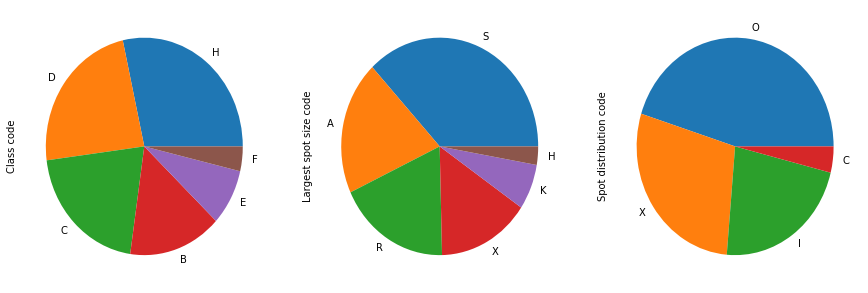

In [7]:
fig = plt.figure()

fig.add_subplot(131)
dataset['Class code'].value_counts().plot.pie()

fig.add_subplot(132)
dataset['Largest spot size code'].value_counts().plot.pie()

fig.add_subplot(133)
dataset['Spot distribution code'].value_counts().plot.pie()

plt.show()

# Data Preprocessing

## Converting Categorical

In [8]:
dataset.dtypes

Class code                     object
Largest spot size code         object
Spot distribution code         object
Activity                        int64
Evolution                       int64
Flare activity                  int64
Historically-complex            int64
Historically-complex region     int64
Area                            int64
Largest spot area               int64
C-class flares production       int64
M-class flares production       int64
X-class flares production       int64
dtype: object

In [9]:
codes = {"Class code":             {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "H": 7},
         "Largest spot size code": {"X": 0, "R": 1, "S": 2, "A": 3, "H": 4, "K": 5},
         "Spot distribution code": {"X": 0, "I": 1, "O": 2, "C": 3}}
dataset.replace(codes, inplace=True)
dataset.head()

,Class code,Largest spot size code,Spot distribution code,Activity,Evolution,Flare activity,Historically-complex,Historically-complex region,Area,Largest spot area,C-class flares production,M-class flares production,X-class flares production
0,2,2,2,1,2,1,1,2,1,2,0,0,0
1,3,2,2,1,3,1,1,2,1,2,0,0,0
2,2,2,2,1,3,1,1,2,1,1,0,0,0
3,3,2,2,1,3,1,1,2,1,2,0,0,0
4,3,3,2,1,3,1,1,2,1,2,0,0,0


In [10]:
dataset.dtypes

Class code                     int64
Largest spot size code         int64
Spot distribution code         int64
Activity                       int64
Evolution                      int64
Flare activity                 int64
Historically-complex           int64
Historically-complex region    int64
Area                           int64
Largest spot area              int64
C-class flares production      int64
M-class flares production      int64
X-class flares production      int64
dtype: object

## Data Scaling

It was not needed because all used algorithms already implemented it.

In [11]:
# dataset -= dataset.min()
# dataset /= dataset.max()
# dataset *= 100

# dataset.head(5)

# Summarizing the Dataset

In [12]:
# shape
print(dataset.shape)

(1389, 13)


In [13]:
# descriptions
print(dataset.describe())

        Class code  Largest spot size code  Spot distribution code  \
count  1389.000000             1389.000000             1389.000000   
mean      3.785457                1.970482                1.244060   
std       2.235112                1.306653                0.912712   
min       1.000000                0.000000                0.000000   
25%       2.000000                1.000000                0.000000   
50%       3.000000                2.000000                1.000000   
75%       7.000000                3.000000                2.000000   
max       7.000000                5.000000                3.000000   

          Activity    Evolution  Flare activity  Historically-complex  \
count  1389.000000  1389.000000     1389.000000           1389.000000   
mean      1.150468     2.421166        1.089993              1.395968   
std       0.357658     0.617129        0.403292              0.489234   
min       1.000000     1.000000        1.000000              1.000000   
25% 

## Data Visualization

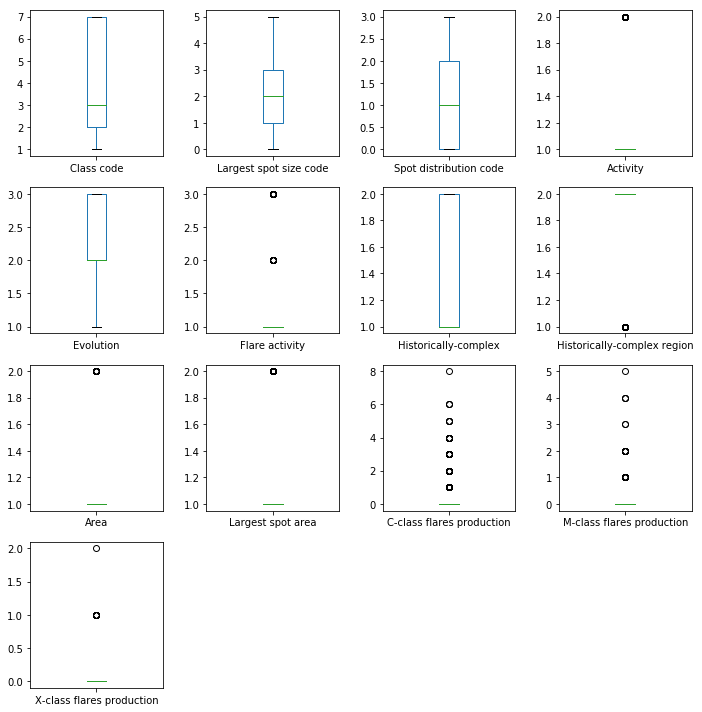

In [14]:
# box and whisker plots
plt.rcParams["figure.figsize"] = 10, 10
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.tight_layout()

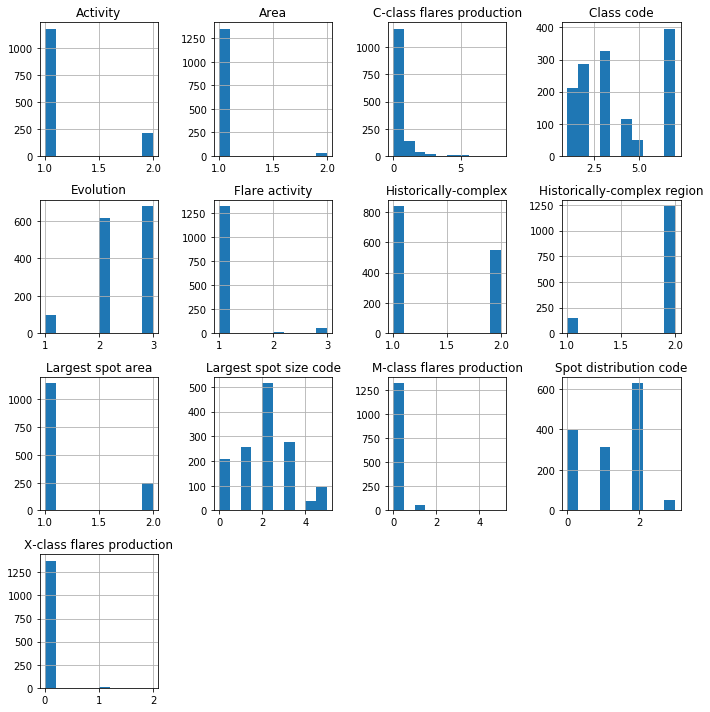

In [15]:
# histograms
dataset.hist()
plt.tight_layout()

# Model Fitting

## Splitting Dataset

In [16]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:10]
Y = array[:,10:]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

## Spot Check Algorithms

In [17]:
warnings.filterwarnings('ignore')

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
data_mean = np.zeros(shape=(len(Y[0]), len(models)))
data_std = np.zeros(shape=(len(Y[0]), len(models)))
names = []
results = []
model_num = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    names.append(name)
    for cl in range(len(Y[0])):
        cv_results = model_selection.cross_val_score(model, X_train, Y_train[:,cl], cv=kfold, scoring=scoring)
        results.append(cv_results)
        data_mean[cl][model_num] = cv_results.mean()
        data_std[cl][model_num] = cv_results.std()
    model_num += 1

data = data_mean
columns = names
index = ['C-class flares production', 'M-class flares production', 'X-class flares production']
res_mean = pandas.DataFrame(data, index=index, columns=columns)

data = data_std
columns = names
index = ['C-class flares production', 'M-class flares production', 'X-class flares production']
res_std = pandas.DataFrame(data, index=index, columns=columns)

res_mean

,LR,LDA,KNN,CART,NB,SVM
C-class flares production,0.841562,0.811865,0.834371,0.808285,0.240315,0.845166
M-class flares production,0.953185,0.929770,0.949582,0.928885,0.720906,0.953185
X-class flares production,0.991892,0.971195,0.990090,0.988288,0.796533,0.991892


In [18]:
res_std

,LR,LDA,KNN,CART,NB,SVM
C-class flares production,0.034788,0.028141,0.038523,0.045570,0.013212,0.035147
M-class flares production,0.016037,0.020115,0.015738,0.021512,0.131152,0.016037
X-class flares production,0.007483,0.014970,0.007483,0.005769,0.076979,0.007483


## Comparing Algorithms

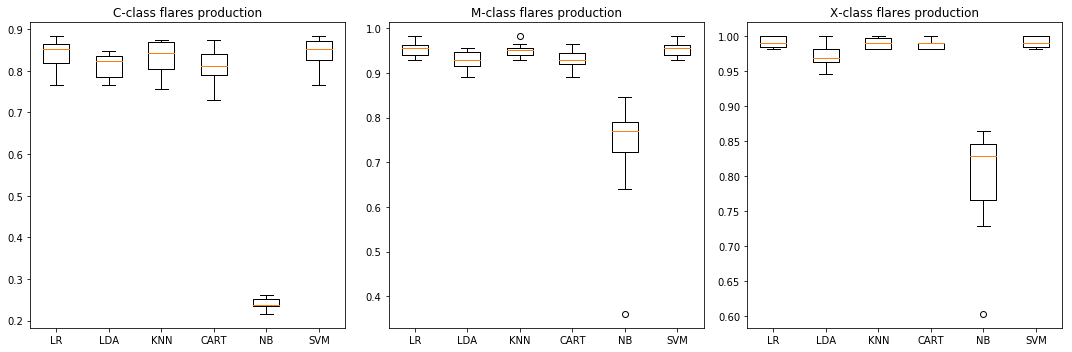

In [19]:
plt.rcParams["figure.figsize"] = 15, 5
fig = plt.figure()
# fig.suptitle('Algorithm Comparison')

for i in range(len(Y[0])):
    ax = fig.add_subplot('13' + str(i+1))
    plt.boxplot(results[i::len(Y[0])])
    ax.set_xticklabels(names)
    plt.title(index[i])

plt.tight_layout()

# Making predictions on validation dataset
For "C-class flares production".

In [20]:
svm = SVC()
svm.fit(X_train, Y_train[:,0])
predictions = svm.predict(X_validation)
print("Accurace score:", accuracy_score(Y_validation[:,0], predictions))
print("\nConfusion Matrix\n")
print(confusion_matrix(Y_validation[:,0], predictions))
print("\nPrecision/recall table\n")
print(classification_report(Y_validation[:,0], predictions))

Accurace score: 0.8345323741007195

Confusion Matrix

[[232   0   0   0   0   0]
 [ 34   0   0   0   0   0]
 [  7   0   0   0   0   0]
 [  2   0   0   0   0   0]
 [  2   0   0   0   0   0]
 [  1   0   0   0   0   0]]

Precision/recall table

             precision    recall  f1-score   support

          0       0.83      1.00      0.91       232
          1       0.00      0.00      0.00        34
          2       0.00      0.00      0.00         7
          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00         2
          5       0.00      0.00      0.00         1

avg / total       0.70      0.83      0.76       278

